In [1]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-12-18 09:47:15--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.01s   

2020-12-18 09:47:15 (35.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns to something better
df.columns = ['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [10]:
df2 = df[['data', 'b_labels']]

In [11]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df2.to_csv('spam2.csv', index=False)

In [13]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    tokenize='spacy',
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

# Note: if you don't specify use_vocab=False, then PyTorch will
# complain later when you try to iterate over the dataset that
# the attribute `vocab` doesn't exist.

# Note 2: if you don't specify is_target=True, then PyTorch will
# assume it's part of the input, so when you iterate over the
# dataset it will be like:
# for (inputs, targets), _ in iterator:
# where the 2nd element (_) should have been the target.

dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [14]:
train_dataset, test_dataset = dataset.split() # default is 0.7

In [15]:
TEXT.build_vocab(train_dataset,)

In [16]:
vocab = TEXT.vocab

In [17]:
vocab.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'to': 3,
             'I': 4,
             ',': 5,
             'you': 6,
             '?': 7,
             'a': 8,
             '!': 9,
             'the': 10,
             '...': 11,
             'i': 12,
             'and': 13,
             'in': 14,
             'is': 15,
             'u': 16,
             'me': 17,
             '..': 18,
             'for': 19,
             'my': 20,
             'it': 21,
             'of': 22,
             'your': 23,
             'that': 24,
             'have': 25,
             'do': 26,
             'on': 27,
             "'s": 28,
             '&': 29,
             '2': 30,
             ' ': 31,
             'call': 32,
             "'m": 33,
             'are': 34,
             'now': 35,
             ':': 36,
             ';': 37,
             'not': 38,
             'be': 39,
             "n't": 40

In [18]:
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'to',
 'I',
 ',',
 'you',
 '?',
 'a',
 '!',
 'the',
 '...',
 'i',
 'and',
 'in',
 'is',
 'u',
 'me',
 '..',
 'for',
 'my',
 'it',
 'of',
 'your',
 'that',
 'have',
 'do',
 'on',
 "'s",
 '&',
 '2',
 ' ',
 'call',
 "'m",
 'are',
 'now',
 ':',
 ';',
 'not',
 'be',
 "n't",
 'at',
 'or',
 'get',
 'will',
 'can',
 'with',
 'U',
 'so',
 '*',
 '-',
 'nt',
 'ur',
 'but',
 '4',
 'You',
 'up',
 'from',
 ')',
 '/',
 'lt;#&gt',
 'out',
 'know',
 'we',
 'when',
 'go',
 '"',
 'this',
 'all',
 'if',
 'like',
 'just',
 'was',
 "'ll",
 'come',
 'got',
 'there',
 'day',
 'time',
 'Do',
 'am',
 'then',
 'No',
 'only',
 'How',
 'what',
 'he',
 'home',
 'going',
 'lor',
 'want',
 'no',
 'send',
 'love',
 'good',
 'n',
 'by',
 'need',
 'one',
 'Call',
 'about',
 '_',
 'did',
 'da',
 'still',
 'Ok',
 'back',
 'later',
 'text',
 'If',
 'its',
 'been',
 'see',
 'We',
 'Sorry',
 'here',
 'Ì',
 'free',
 'her',
 'how',
 'our',
 'as',
 'has',
 'ok',
 'But',
 'week',
 'Just',
 'What',
 'ta

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [20]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
        batch_sizes=(32, 256), device=device)

In [21]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[   1,    1,    1,  ..., 6665,   28, 7369],
        [   1,    1,    1,  ...,    3,   10, 7654],
        [   1,    1,    1,  ...,  226,   19,    9],
        ...,
        [   1,    1,    1,  ...,   22,  191,    7],
        [   1,    1,    1,  ...,   13, 1197,    9],
        [   1,    1,    1,  ..., 9386,   66,   66]], device='cuda:0') shape: torch.Size([32, 42])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1], device='cuda:0') shape: torch.Size([32])


In [22]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[ 114,   49,   72,  ...,   10,    0,    2],
        [  82,   20,    0,  ..., 8948,    5,    0],
        [ 220,   15,   20,  ...,   96,    0,   18],
        ...,
        [   1,    1,    1,  ...,    1,    1,  276],
        [   1,    1,    1,  ...,    1,    1,  105],
        [   1,    1,    1,  ...,    1,    1,  832]], device='cuda:0')
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,


In [23]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [24]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(9467, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [25]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [26]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [27]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 20)

Epoch 1/20, Train Loss: 0.4488,       Test Loss: 0.4312, Duration: 0:00:00.910417
Epoch 2/20, Train Loss: 0.3401,       Test Loss: 0.3934, Duration: 0:00:00.680391
Epoch 3/20, Train Loss: 0.2508,       Test Loss: 0.2891, Duration: 0:00:00.751440
Epoch 4/20, Train Loss: 0.1704,       Test Loss: 0.2594, Duration: 0:00:00.713881
Epoch 5/20, Train Loss: 0.1240,       Test Loss: 0.2259, Duration: 0:00:00.697889
Epoch 6/20, Train Loss: 0.0920,       Test Loss: 0.1910, Duration: 0:00:00.671192
Epoch 7/20, Train Loss: 0.0701,       Test Loss: 0.2178, Duration: 0:00:00.614836
Epoch 8/20, Train Loss: 0.0566,       Test Loss: 0.1755, Duration: 0:00:00.613326
Epoch 9/20, Train Loss: 0.0459,       Test Loss: 0.1851, Duration: 0:00:00.621808
Epoch 10/20, Train Loss: 0.0374,       Test Loss: 0.2129, Duration: 0:00:00.646343
Epoch 11/20, Train Loss: 0.0307,       Test Loss: 0.2006, Duration: 0:00:00.637069
Epoch 12/20, Train Loss: 0.0255,       Test Loss: 0.2106, Duration: 0:00:00.620707
Epoch 13/20, 

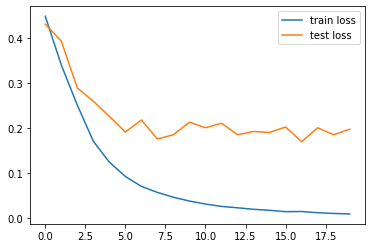

In [28]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [29]:
# Accuracy

p_train = []
y_train = []
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = list((outputs > 0).cpu().numpy())
  
  # Store predictions
  p_train += predictions
  y_train += list(targets.cpu().numpy())

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)


p_test = []
y_test = []
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = list((outputs > 0).cpu().numpy())
  
  # Store predictions
  p_test += predictions
  y_test += list(targets.cpu().numpy())

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9982, Test acc: 0.9426


In [30]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [31]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[1357   88]
 [   8  219]]


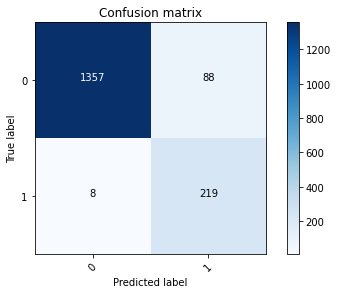

In [32]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, [0, 1])

Confusion matrix, without normalization
[[3378    2]
 [   5  515]]


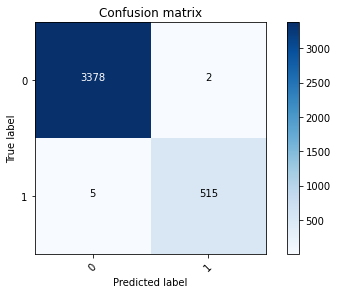

In [33]:
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0, 1])

In [34]:
### Make predictions ###

# get some random test data
df[df.labels == 'spam'].sample(3)

,labels,data,b_labels
2353,spam,Please CALL 08712402902 immediately as there i...,1
5214,spam,Natalja (25/F) is inviting you to be her frien...,1
2957,spam,U have a secret admirer. REVEAL who thinks U R...,1


In [35]:
small_sample = df[df.labels == 'spam'].sample(3)
with open('sample_test.csv', 'w') as f:
  f.write("data\n") # header
  for i, row in small_sample.iterrows():
    f.write(row['data'] + "\n")

In [36]:
!cat sample_test.csv

data
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08718738002 Identifier Code: 48922 Expires 21/11/04
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. å£1.50 SP:Tyrone
SplashMobile: Choose from 1000s of gr8 tones each wk! This is a subscrition service with weekly tones costing 300p. U have one credit - kick back and ENJOY


In [37]:
sample_dataset = ttd.TabularDataset(
    path='sample_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT)]
)

In [38]:
sample_iter = ttd.Iterator(
    sample_dataset,
    batch_size=32,
    sort_key=lambda x: len(x.data),
    device=device)

In [39]:
for inputs in sample_iter:
  # Returns a Batch object, not tensor
  print("inputs:", inputs)

  # Forward pass
  outputs = model(inputs.data)

  # Print logits
  print(outputs)

inputs: 
[torchtext.data.batch.Batch of size 3]
	[.data]:[torch.cuda.LongTensor of size 3x31 (GPU 0)]
tensor([[5.5045],
        [5.5811],
        [5.5072]], device='cuda:0', grad_fn=<AddmmBackward>)


In [40]:
single_sentence = 'Our dating service has been asked 2 contact U by someone shy! CALL 09058091870 NOW all will be revealed.'

In [41]:
TEXT.preprocess(single_sentence)

['Our',
 'dating',
 'service',
 'has',
 'been',
 'asked',
 '2',
 'contact',
 'U',
 'by',
 'someone',
 'shy',
 '!',
 'CALL',
 '09058091870',
 'NOW',
 'all',
 'will',
 'be',
 'revealed',
 '.']

In [42]:
TEXT.numericalize([TEXT.preprocess(single_sentence)])

tensor([[1002,  849,  307,  122,  111,  606,   30,  234,   47,   96,  264, 3967,
            9,  507, 4278,  309,   68,   44,   39, 3926,    2]])

In [43]:
toks = TEXT.preprocess(single_sentence)
sent_idx = TEXT.numericalize([toks])
model(sent_idx.to(device))

tensor([[4.5959]], device='cuda:0', grad_fn=<AddmmBackward>)

Check out my other notebook which uses the Keras API for text preprocessing. It achieves better accuracy and the API is more convenient / consistent in my opinion.

https://colab.research.google.com/drive/1RC6CVAXkyHjr4prvkbVpMFM5UBJJ2ZGH